In [12]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

parent_path = os.path.dirname(os.getcwd())
sys.path.append(parent_path)

import databento as db
import pandas as pd
from tools.path import *

In [61]:
from dotenv import load_dotenv

env = get_env_path('project')
load_dotenv(env)

True

In [63]:
'''
# ----- Use DataBento to get stock data -----

key = os.getenv("DATABENTO_API_KEY")
def generate_stock_data(stock_name, key, start_date, end_date, schema, path):
    client = db.Historical(key=key)

    data = client.timeseries.get_range(
        dataset="XNAS.ITCH",
        schema=schema,
        symbols=stock_name,
        start=start_date,
        end=end_date
    )

    df = data.to_df()
    df.index = df.index.tz_convert("US/Eastern")
    df = df.drop(columns=['rtype', 'publisher_id', 'instrument_id'])
    df = df.reset_index()
    df.rename(columns={'ts_event': 'date'}, inplace=True)
    df['date'] = pd.to_datetime(df['date']).dt.date

    df.to_feather(path+'/data/'+stock_name+'.feather')
'''

In [25]:
import yfinance as yf
import os

def generate_stock_data(stock_name, start_date, end_date, path):
    stock_df = yf.download(stock_name, start=start_date, end=end_date)
    stock_df.reset_index(inplace=True)

    stock_df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Adj Close': 'close', 'Volume': 'volume'}, inplace=True)
    stock_df = stock_df.drop(columns=['Close'])
    
    if not os.path.exists(path + '/data/'):
        os.makedirs(path + '/data/')
    
    stock_df.to_feather(path + '/data/' + stock_name + '.feather') 

start_date = "2018-05-01"
end_date = "2024-05-01"
stock_name = "AAPL"
path = parent_path

stock_list = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']

for stock in stock_list:
    generate_stock_data(stock, start_date, end_date, path)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


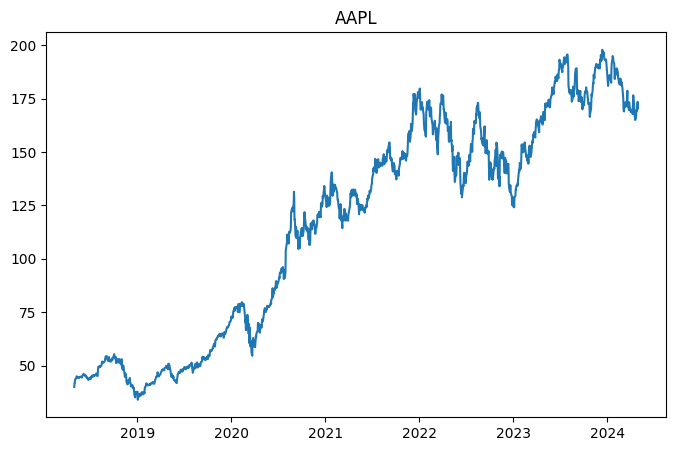

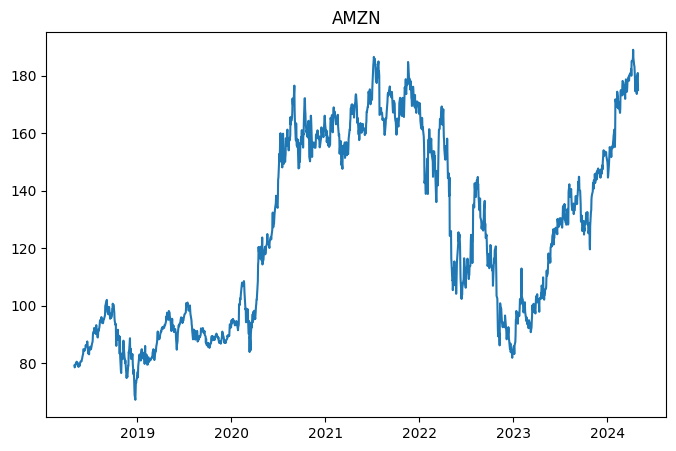

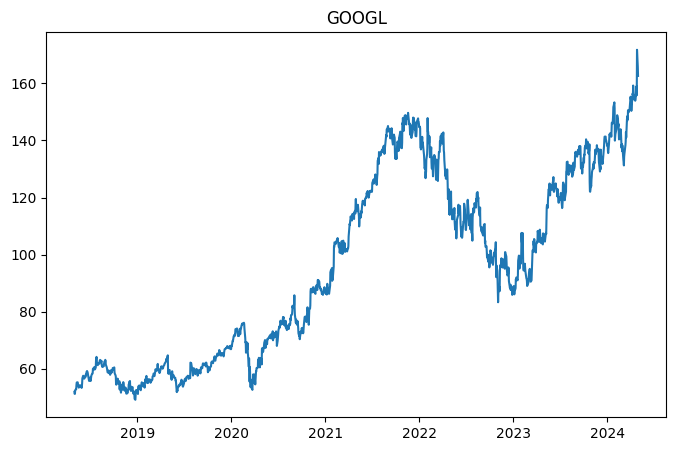

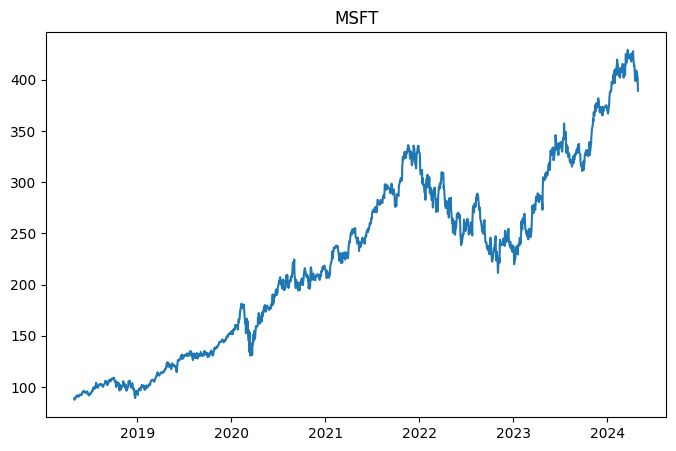

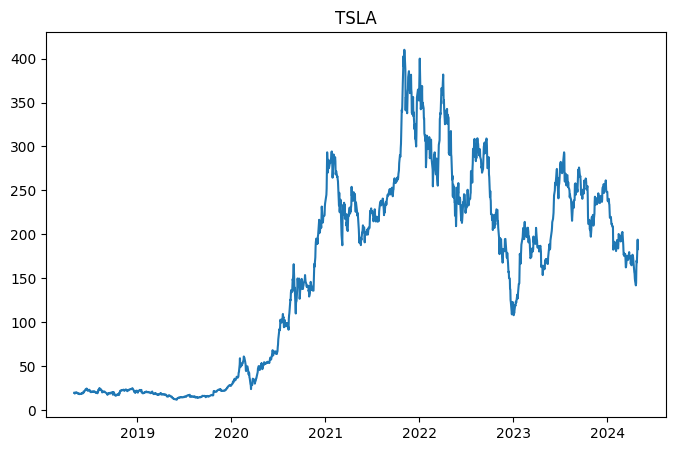

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

for stock in stock_list:
    df = pd.read_feather(parent_path + '/data/' + stock + '.feather')
    plt.figure(figsize=(8, 5))
    plt.title(stock)
    plt.plot(df['date'], df['close'])